# 프로듀스101 최종투표 결과 회귀분석 및 추정 (독립변수 12개)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#!/usr/bin/env/ python3
#-*- coding: utf-8 -*-

In [3]:
from __future__ import division
from __future__ import print_function
from sklearn import svm
from pip.req.req_file import preprocess
from mistune import preprocessing
from numpy import newaxis
from sklearn.linear_model.base import LinearRegression
from sklearn.preprocessing import scale
import statsmodels.regression
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk
import pickle

sns.set()

plt.rc('font',family='AppleGothic')

import sys
print(sys.stdin.encoding, sys.stdout.encoding)

UTF-8 UTF-8


In [4]:
# OLS 그려주는 함수 만들기

def OLS_result(y, x) : 
    model_OLS = sm.OLS(y, x) 
    result_OLS = model_OLS.fit()
#     print(result_OLS.summary())
    
    return result_OLS

In [5]:
# OLS fit_regularized 그려주는 함수 만들기
def OLS_regularized(y, x, alpha) : 
    model_OLS = sm.OLS(y, x) 
    result_OLS = model_OLS.fit_regularized(alpha=alpha)
    
    return result_OLS

In [6]:
# Dataframe 전체 출력 함수

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# What is Project 101?

- 서바이벌 방송 프로그램 프로듀스101(m-net)의 데이터 분석 및 결과 추정
- Analyze TV show named Produce101 (Estimate your girls)


![What is Produce 101](Images/whatisproduce101.jpg)

# What is Project 101?

- 서바이벌 방송 프로그램 프로듀스101(m-net)의 데이터 분석 및 결과 추정
- Analyze TV show named Produce101 (Estimate your girls)

![What is Produce 101_3](Images/votepage.png)

# Data
- [crawling from m-net webpage](http://mnettv.interest.me/produce101/page/p101.page.profile.dbp?id=88)
- put into dataframe with the Python

# Data

### 1. SAMPLE : 97 people (retire 4 people)

### 2. TAGET (Y)
- votes : 엠넷 홈페이지에서 1일 1명당 11표
- votes : on m-net webpage with 1 person 11 votes in every day)

### 3. FEATURE (X1, X2, ..., X12)
- expo_1 : 1차 방출평가 전에 Produce101 방송된 1회~4회까지 각 연습생의 방송 노출 시간
- expo_2 : 2차 방출평가 전에 Produce101 방송된 5회~7회까지 각 연습생의 방송 노출 시간
    - (출처 : [방송모니터위원회]Mnet 오디션 프로그램 <프로듀스 101> 모니터보고서(2016.3.25))

- neg_1 : 1,2회 / 방송 후 부정적 여론 형성 (허찬미 : 인사 안함 논란, 1위자리 앉음 | 오서정 : 슈퍼스타K 안예슬 논란) [category]
- order_name : 투표 홈페이지 이름 순으로 상위 11명 노출 여부 [category]
- order_agency : 투표 홈페이지 소속사 순으로 상위 11명 노출 여부 [category]
- level_1 : 1회, 2회 / 1차 레벨 평가 테스트 후 판정 (A:5 / B:4 / C:3 / D:2 / F:1) [category]
- level_2 : 2회 / 2차 레벨 평가 테스트 후 판정 (A:5 / B:4 / C:3 / D:2 / F:1) [category]
- age : 나이
- height : 신장
- visual : 연습생들이 직접 뽑은 비주얼 1~11위 [category]
- agency_category : 소속 연예기획사 카테고리값 (대형:3 / 중소형:2 / 개인:1) [category]
    - 연예 전문 웹진 분류 참고 : http://ize.co.kr/articleView.html?no=2016022121027299563
    
- agency_member_count : 같은 소속사 연습생 수
- is_ranker_same_agency_1 : 1차 방출평가 시 같은 소속사 연습생이 상위 11위에 포함되어 있는가? (Hard Carry) [category]
- is_ranker_same_agency_2 : 2차 방출평가 시 같은 소속사 연습생이 상위 11위에 포함되어 있는가? (Hard Carry) [category]

# EDA(Exploratory data analysis)

In [7]:
produce101_df = pd.DataFrame.from_csv("produce101_raw.csv",
                                      index_col='name', encoding='utf-8')
produce101_df

,agency,vote_1,vote_2,expo_1,expo_2,imp_1,imp_2,neg_1,order_name,order_agency,...,level_2,age,height,visual,agency_category,id,thumb_pic_url,agency_member_count,is_ranker_same_agency_1,is_ranker_same_agency_2
name,,,,,,,,,,,,,,,,,,,,,
김세정,Jellyfish(젤리피쉬),559694,1473685,105,104,39,8,0,0,0,...,5,20,164.0,1,3,88,http://static.global.mnet.com/data/od/images/g...,3,1,1
전소미,JYP,528772,1201490,171,63,49,21,0,0,0,...,4,15,168.0,1,3,40,http://static.global.mnet.com/data/od/images/g...,1,0,0
최유정,판타지오,392773,1286447,134,71,10,50,0,0,0,...,5,17,159.0,0,3,42,http://static.global.mnet.com/data/od/images/g...,5,1,1
주결경,PLEDIS(플레디스),387537,885556,6,31,13,3,0,0,0,...,5,18,166.0,1,3,136,http://static.global.mnet.com/data/od/images/g...,7,1,1
강미나,Jellyfish(젤리피쉬),376977,1212720,34,100,33,8,0,1,0,...,5,17,162.0,0,3,90,http://static.global.mnet.com/data/od/images/g...,3,1,1
기희현,MBK,294540,481070,91,19,26,5,0,1,0,...,5,21,167.0,1,3,187,http://static.global.mnet.com/data/od/images/g...,3,1,1
김다니,MBK,273930,419427,52,9,28,1,0,1,0,...,5,17,172.0,0,3,186,http://static.global.mnet.com/data/od/images/g...,3,1,1
정채연,MBK,251469,696808,10,34,21,4,0,0,0,...,3,19,166.0,1,3,185,http://static.global.mnet.com/data/od/images/g...,3,1,1
김나영,Jellyfish(젤리피쉬),250552,931084,65,44,28,5,0,1,0,...,5,21,169.0,0,3,89,http://static.global.mnet.com/data/od/images/g...,3,1,1


/Users/DS/.pyenv/versions/3.5.0/envs/my-virtual-env-3.5.0/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


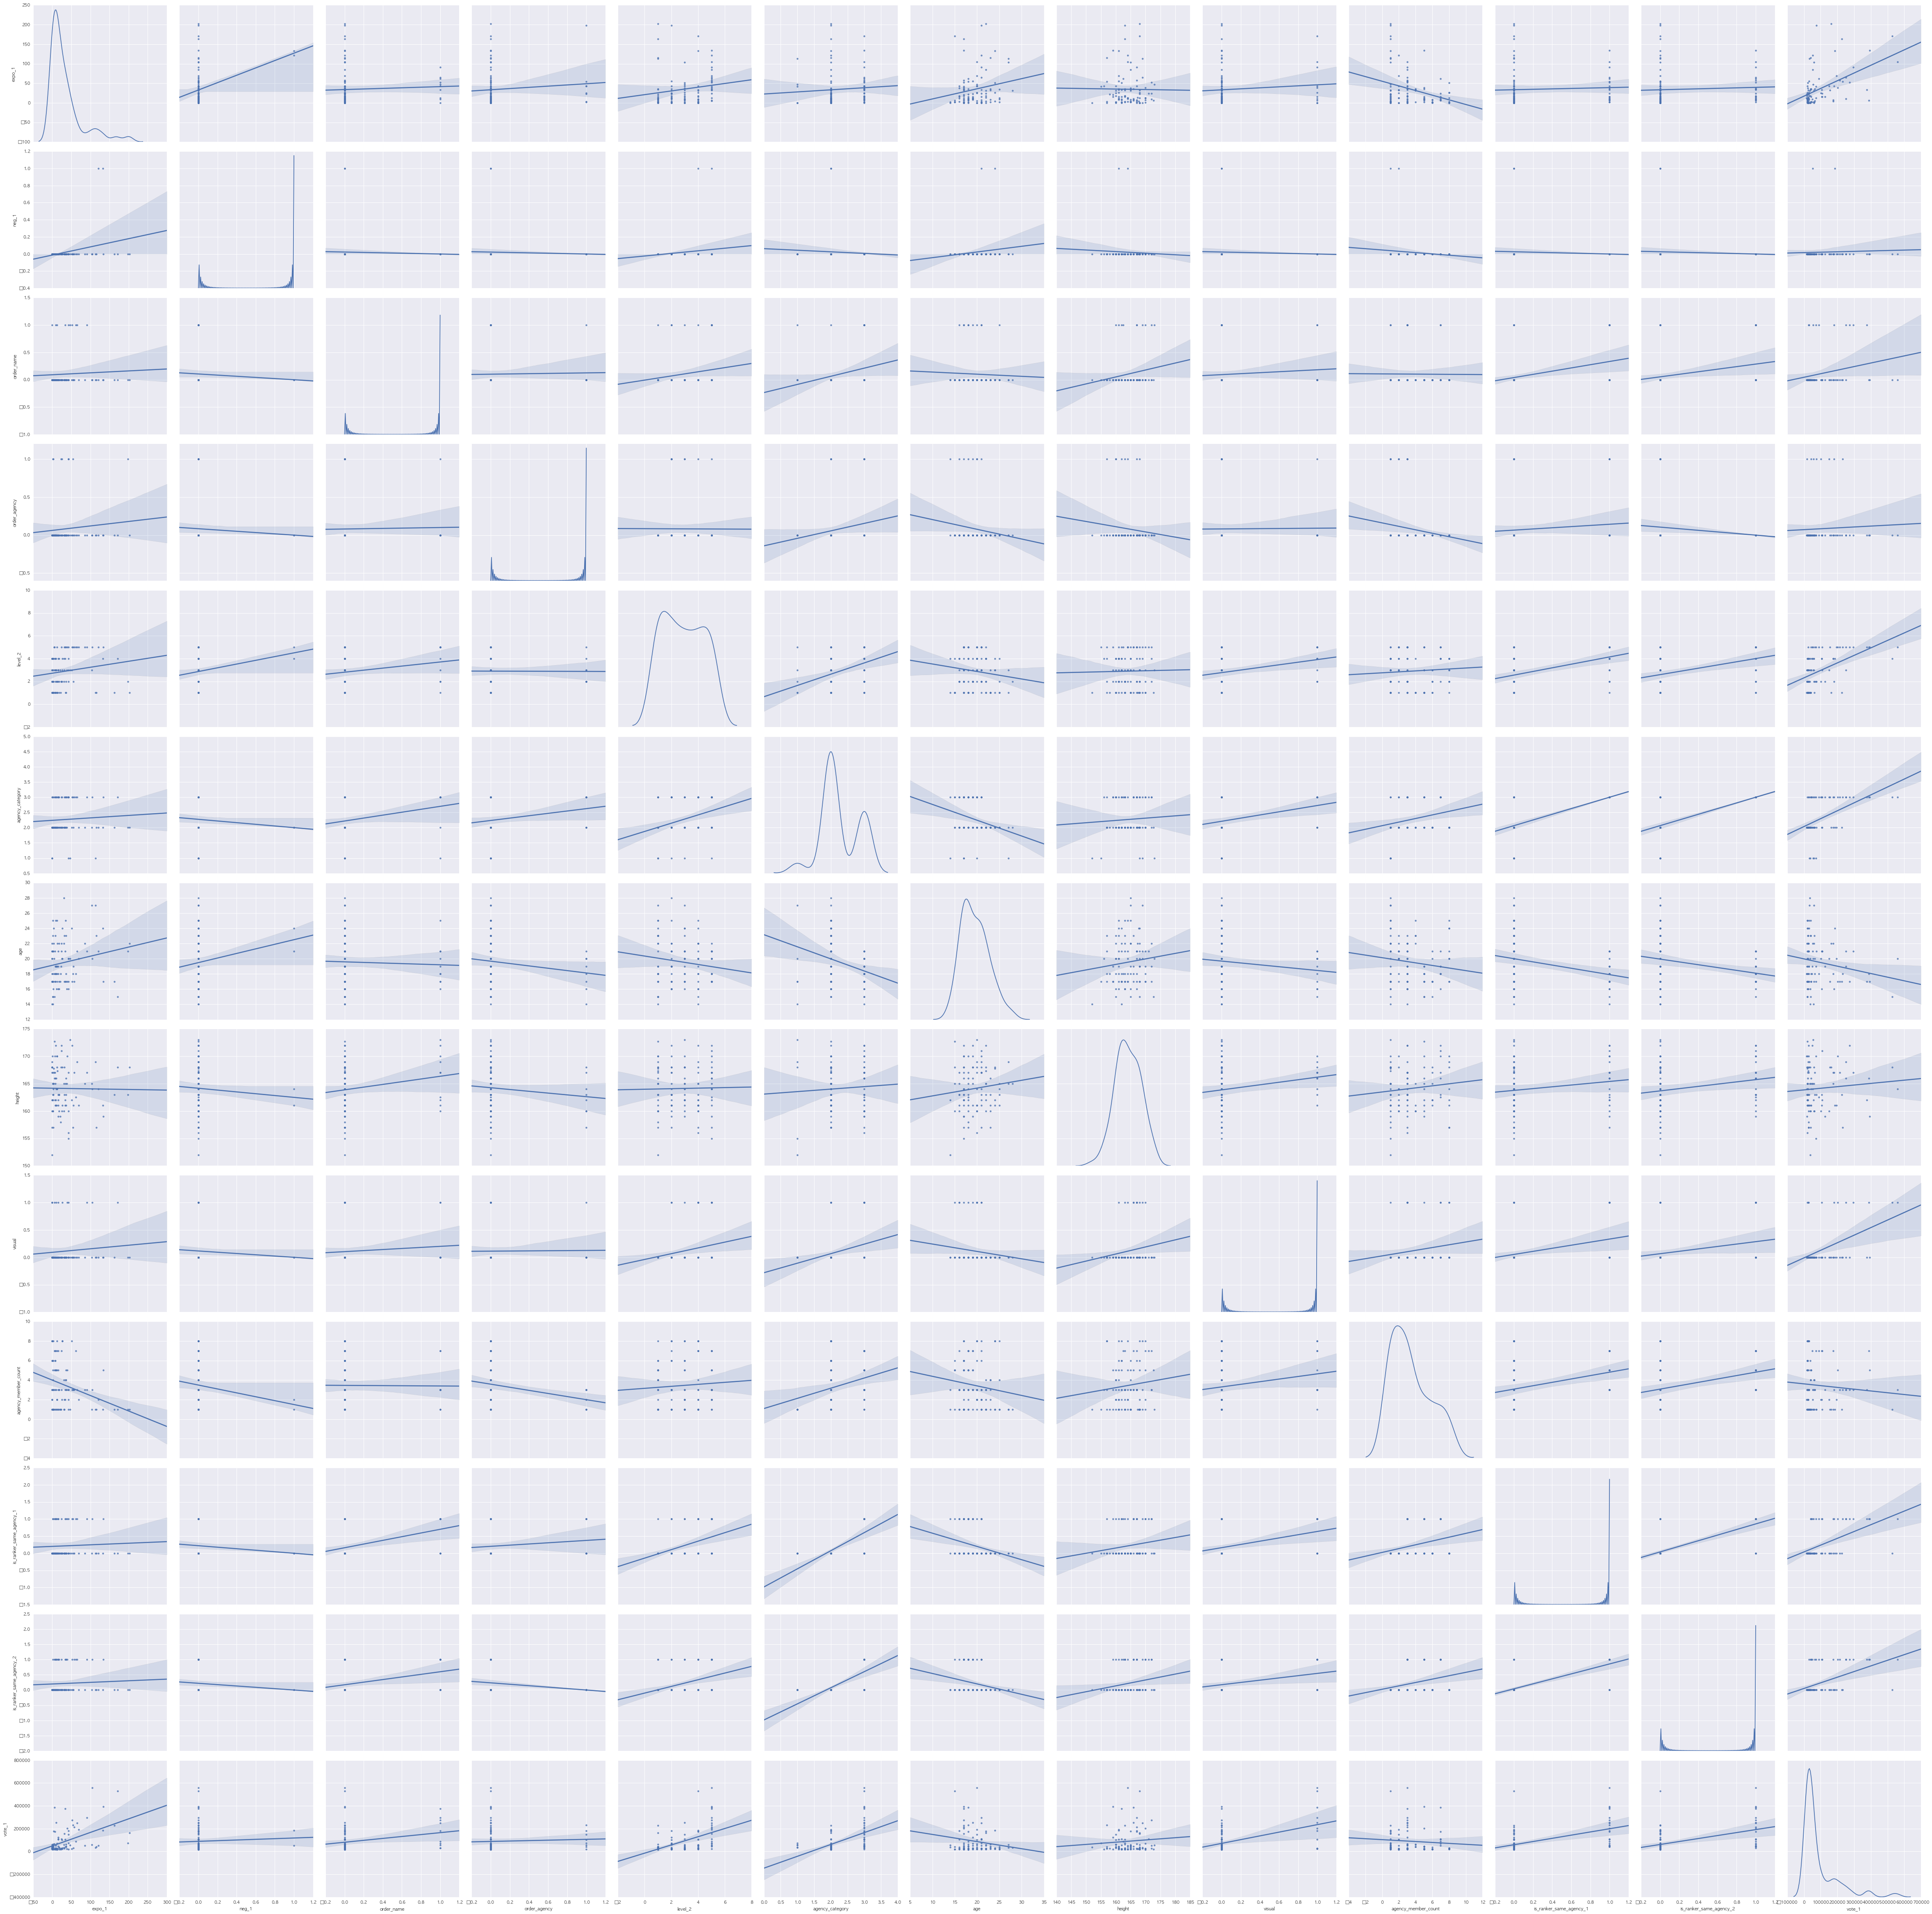

In [8]:
# First EDA(Exploratory data analysis) with vote_1(target)

sns.pairplot(produce101_df, diag_kind="kde", kind="reg"
             ,vars = ['expo_1', 'neg_1', 'order_name', 'order_agency',
                      'level_2', 'agency_category', 'age', 'height', 'visual', 'agency_member_count'
                      ,'is_ranker_same_agency_1','is_ranker_same_agency_2', 'vote_1'], size=5)
plt.show()

# Machine Learning Model

- OLS Regression
    - In statistics, ordinary least squares (OLS) or linear least squares is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the differences between the observed responses in some arbitrary dataset and the responses predicted by the linear approximation of the data (visually this is seen as the sum of the vertical distances between each data point in the set and the corresponding point on the regression line.
    
![](Images/regression_cartoon.png)

# Data Frame(SET)

In [9]:
Y = produce101_df['vote_1']
Y2 = produce101_df['vote_2']
X = pd.DataFrame(produce101_df, 
                 columns = ['expo_1', 'expo_2', 'neg_1', 'order_name'
                            , 'order_agency', 'level_1','level_2'
                            , 'agency_category', 'age', 'height', 'visual'
                            , 'agency_member_count', 'is_ranker_same_agency_1', 'is_ranker_same_agency_2' ])
X.head()

,expo_1,expo_2,neg_1,order_name,order_agency,level_1,level_2,agency_category,age,height,visual,agency_member_count,is_ranker_same_agency_1,is_ranker_same_agency_2
name,,,,,,,,,,,,,,
김세정,105,104,0,0,0,5,5,3,20,164.0,1,3,1,1
전소미,171,63,0,0,0,5,4,3,15,168.0,1,1,0,0
최유정,134,71,0,0,0,2,5,3,17,159.0,0,5,1,1
주결경,6,31,0,0,0,5,5,3,18,166.0,1,7,1,1
강미나,34,100,0,1,0,5,5,3,17,162.0,0,3,1,1


# Preprocessing

In [10]:
# Category 값을 제외한 실수값 preprocessing
X_prepro = X

X_prepro[['expo_1']] = scale (X[['expo_1']])
X_prepro[['expo_2']] = scale (X[['expo_2']])
X_prepro[['age']] = scale (X[['age']])
X_prepro[['height']] = scale (X[['height']])
X_prepro[['level_1']] = scale (X[['level_1']])
X_prepro[['level_2']] = scale (X[['level_2']])
X_prepro[['agency_member_count']] = scale (X[['agency_member_count']])
X_prepro

,expo_1,expo_2,neg_1,order_name,order_agency,level_1,level_2,agency_category,age,height,visual,agency_member_count,is_ranker_same_agency_1,is_ranker_same_agency_2
name,,,,,,,,,,,,,,
김세정,1.577921,3.171328,0,0,0,1.662945,1.426050,3,0.149748,-0.029856,1,-0.197431,1,1
전소미,3.060435,1.638468,0,0,0,1.662945,0.747977,3,-1.500886,0.911953,1,-1.067920,0,0
최유정,2.229329,1.937563,0,0,0,-0.567087,1.426050,3,-0.840632,-1.207117,0,0.673059,1,1
주결경,-0.645850,0.442090,0,0,0,1.662945,1.426050,3,-0.510505,0.441048,1,1.543548,1,1
강미나,-0.016905,3.021780,0,1,0,1.662945,1.426050,3,-0.840632,-0.500761,0,-0.197431,1,1
기희현,1.263448,-0.006552,0,1,0,0.176257,1.426050,3,0.479875,0.676500,1,-0.197431,1,1
김다니,0.387417,-0.380421,0,1,0,0.919601,1.426050,3,-0.840632,1.853761,0,-0.197431,1,1
정채연,-0.556001,0.554250,0,0,0,0.176257,0.069904,3,-0.180379,0.441048,1,-0.197431,1,1
김나영,0.679428,0.928118,0,1,0,1.662945,1.426050,3,0.479875,1.147405,0,-0.197431,1,1


# Regression : OLS

- 속성간의 중요도나 관계를 파악하기 위한
- 해석 가능한 모델

In [11]:
print(OLS_result(Y,X_prepro).summary())

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     34.81
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           8.41e-29
Time:                        11:46:16   Log-Likelihood:                -1194.5
No. Observations:                  97   AIC:                             2417.
Df Residuals:                      83   BIC:                             2453.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                    

# Collinearity(공선성) 확인

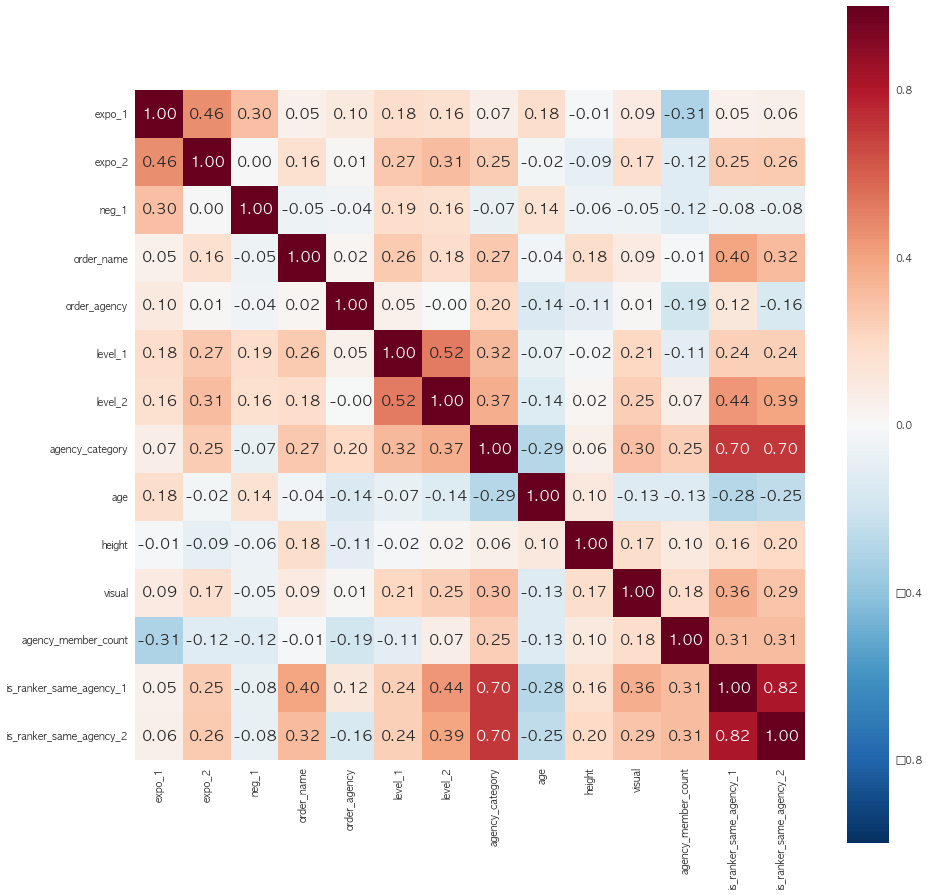

In [12]:
plt.figure(figsize=(15, 15))
sns.heatmap(np.corrcoef(X_prepro.T), annot=True, square=True, fmt='.2f', annot_kws={'size':15},
            yticklabels=X_prepro.columns, xticklabels=X_prepro.columns)

# Collinearity Review
- expo_1 & expo_2 is higher than others
    - 프로듀스101 1~4회와 5~7회간에 방송에 노출된 연습생이 집중되어 있음
    
    
- expo_1 & neg_1 is higher than others
    - 프로듀스101 1~4회에 연습생의 부정적인 모습을 방송에 많이 노출시킴
    
    
- expo_2 & level_2 is higher than others
    - 레벨 평가가 높으면 방송에 많이 노출됨
    
    
- level_1 & level_2 is higher than others
    - 1,2 차 레벨 평가 피처는 최종 결과인 level_2 만 사용해야 함
    

- level_2 & agency_category is higher than others
    - 가능성 1 : 대형기획사에 합격한 것은 실력이 높고 따라서 레벨 평가가 높음
    - 가능성 2 : 대형기획사 체면상 실력이 있는 아이돌을 출현시킴
    - 가능성 3 : 대형기획사라서 실력이 높게 평가됨 (방송 1화에 연습생들의 개인인터뷰때 언급됨)
    
    
- agency_member_count & is_ranker_same_agency_1 is higher than others
    - 11명 의무투표로 인해 11위권 연습생들과 같은 소속사 연습생도 득표를 받을 확률 증가


- is_ranker_same_agency_1 & is_ranker_same_agency_2 is the highest (0.70)
    - 1,2차 방출 평가 간 11위 까지의 연습생 여부가 너무 공선성이 크므로 is_ranker_same_agency_2만 사용


- is_ranker_same_agency_1 & agency_category is the highest (0.70)
    - 11위 까지의 연습생 여부는 소속사의 크기와 비례
    
    

# 1) Feature selection with pure profile

In [13]:
X_prepro_profile = X_prepro.drop(labels = ['expo_1', 'expo_2', 'neg_1', 'order_name', 'order_agency'
                                           , 'level_1', 'height', 'age', 'agency_member_count'
                                           , 'is_ranker_same_agency_1', 'is_ranker_same_agency_1', 'is_ranker_same_agency_2'], axis=1)
print( OLS_result(Y, X_prepro_profile).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     61.94
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           3.46e-22
Time:                        11:46:18   Log-Likelihood:                -1235.0
No. Observations:                  97   AIC:                             2476.
Df Residuals:                      94   BIC:                             2484.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
level_2          3.727e+04   8683.480     

In [14]:
Y2.sort_values(ascending=False).head(11)

name
김세정    1473685
최유정    1286447
강미나    1212720
전소미    1201490
김나영     931084
주결경     885556
김도연     841749
김소혜     833101
정채연     696808
유연정     684660
임나영     665898
Name: vote_2, dtype: int64

# Accuracy = :(
# But I realize pure profile affect to vote

In [15]:
# 추정값 확인
model_OLS = sm.OLS(Y, X_prepro_profile) 
result_OLS = model_OLS.fit()
prediction = result_OLS.fittedvalues 
print_full(prediction.sort_values(ascending=False).head(11))

name
김세정    272298.822531
주결경    272298.822531
김도연    272298.822531
기희현    272298.822531
박시연    247030.031075
전소미    247030.031075
정채연    221761.239619
김지성    211797.514285
이수현    211797.514285
권은빈    196492.448163
서혜린    161259.931374
dtype: float64


# Outlier detection

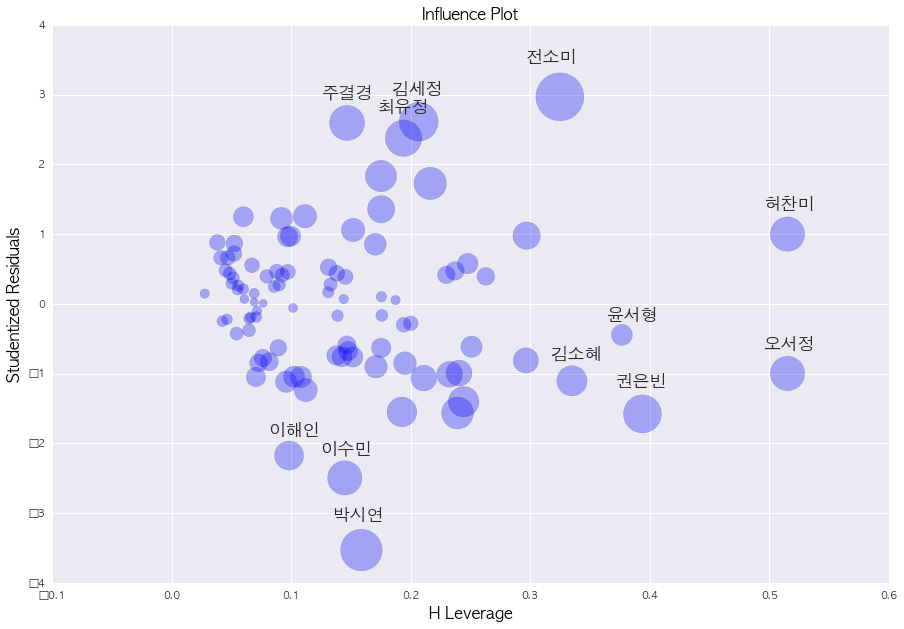

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sm.graphics.influence_plot( OLS_result(Y, X_prepro), plot_alpha=0.3, ax=ax)
plt.show()

# 질문 feature가 8개 이상이면 influence_plot을 못그린다?!

In [17]:
outlier = np.nonzero( OLS_result(Y, X_prepro).outlier_test().ix[:, -1].abs() < 0.01)[0]
outlier

array([], dtype=int64)

# Model export

In [18]:
# open the file for writing as binary
fileObject = open("produce101_OLS_profile", 'wb') 

# this writes the object
pickle.dump( OLS_result(Y, X_prepro), fileObject ) 

# here we close the fileObject
fileObject.close()

In [19]:
# we open the file for reading as binary
fileObject = open("produce101_OLS_profile", 'rb')  

# load the object from the file
model_1 = pickle.load(fileObject)  
# print(model_1.summary())

# 2) Feature Selection with Focusing Broadcast&Agency (carry)
## 2-1)  Before Outlier Removal

In [20]:
X_prepro_carry = X_prepro.drop(labels = ['level_1',], axis=1)
print( OLS_result(Y, X_prepro_carry).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     35.16
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.89e-28
Time:                        11:46:19   Log-Likelihood:                -1197.6
No. Observations:                  97   AIC:                             2421.
Df Residuals:                      84   BIC:                             2455.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                   2

## After feature selection

In [21]:
X_prepro_carry1 = X_prepro_carry.drop(labels = ['neg_1', 'order_agency', 'order_name'
                                                ,'height', 'age', 'is_ranker_same_agency_1'], axis=1)
print( OLS_result(Y, X_prepro_carry1).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     65.03
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.81e-32
Time:                        11:46:19   Log-Likelihood:                -1200.6
No. Observations:                  97   AIC:                             2415.
Df Residuals:                      90   BIC:                             2433.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                   2

# Accuracy = 63.63% :(

In [22]:
Y2.sort_values(ascending=False).head(11)

name
김세정    1473685
최유정    1286447
강미나    1212720
전소미    1201490
김나영     931084
주결경     885556
김도연     841749
김소혜     833101
정채연     696808
유연정     684660
임나영     665898
Name: vote_2, dtype: int64

In [23]:
model_OLS1 = sm.OLS(Y, X_prepro_carry1) 
result_OLS1 = model_OLS1.fit()
prediction1 = result_OLS1.fittedvalues 
print_full(prediction.sort_values(ascending=False).head(11))

name
김세정    272298.822531
주결경    272298.822531
김도연    272298.822531
기희현    272298.822531
박시연    247030.031075
전소미    247030.031075
정채연    221761.239619
김지성    211797.514285
이수현    211797.514285
권은빈    196492.448163
서혜린    161259.931374
dtype: float64


# 2) Feature Selection with Focusing Agency (carry)
## 2-2) After Outlier Removal

In [24]:
X_prepro_carry = X_prepro.drop(labels = ['neg_1', 'order_name', 'order_agency'
                                          ,'level_1', 'age', 'height', 'is_ranker_same_agency_1'], axis=1)
print( OLS_result(Y, X_prepro_carry).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     65.03
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.81e-32
Time:                        11:46:19   Log-Likelihood:                -1200.6
No. Observations:                  97   AIC:                             2415.
Df Residuals:                      90   BIC:                             2433.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                   2

## Outlier detection

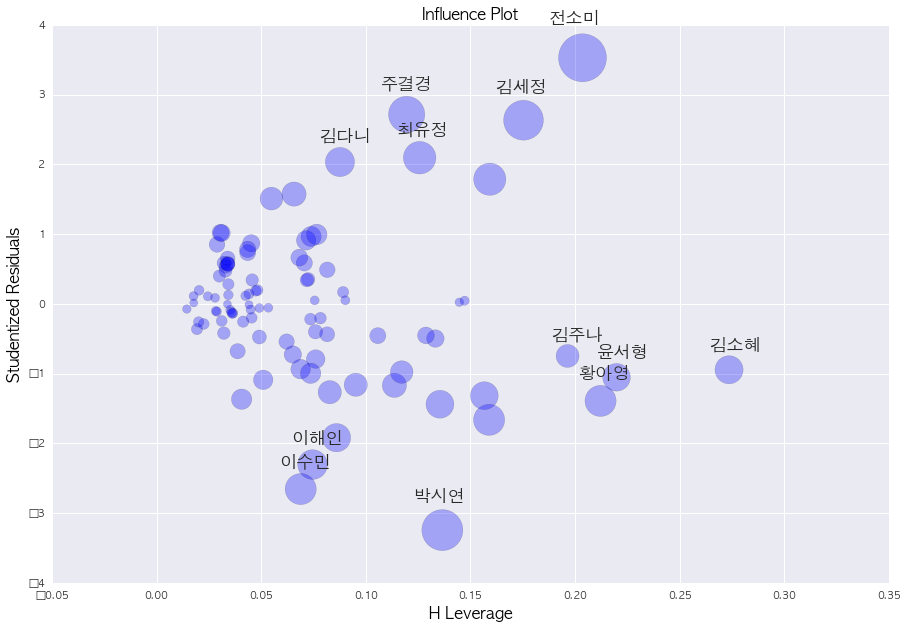

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
sm.graphics.influence_plot( OLS_result(Y, X_prepro_carry), plot_alpha=0.3, ax=ax)
plt.show()

# 질문 feature가 8개 이상이면 influence_plot을 못그린다?!

In [26]:
outlier = np.nonzero( OLS_result(Y, X_prepro_carry).outlier_test().ix[:, -1].abs() < 0.01)[0]
outlier

array([], dtype=int64)

In [27]:
print(X_prepro_carry.ix[outlier])

Empty DataFrame
Columns: [expo_1, expo_2, level_2, agency_category, visual, agency_member_count, is_ranker_same_agency_2]
Index: []


In [28]:
X_prepro_carry_out = X_prepro_carry.drop(X_prepro.index[outlier])
Y_out = Y.drop(X_prepro.index[outlier])
X_prepro_carry_out.head()
# 아웃라이어 샘플 제거된 결과

,expo_1,expo_2,level_2,agency_category,visual,agency_member_count,is_ranker_same_agency_2
name,,,,,,,
김세정,1.577921,3.171328,1.426050,3,1,-0.197431,1
전소미,3.060435,1.638468,0.747977,3,1,-1.067920,0
최유정,2.229329,1.937563,1.426050,3,0,0.673059,1
주결경,-0.645850,0.442090,1.426050,3,1,1.543548,1
강미나,-0.016905,3.021780,1.426050,3,0,-0.197431,1


In [29]:
Y_out.head()

name
김세정    559694
전소미    528772
최유정    392773
주결경    387537
강미나    376977
Name: vote_1, dtype: int64

## After Outlier Removal

In [30]:
print( OLS_result(Y_out, X_prepro_carry_out).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     65.03
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.81e-32
Time:                        11:46:20   Log-Likelihood:                -1200.6
No. Observations:                  97   AIC:                             2415.
Df Residuals:                      90   BIC:                             2433.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                   2

# Outlier review
- Selecting features is dependent on outlier

# Accuracy (with training target) = 72.72% :|

- 각 미션 현장투표 따른 결과에 의한 가산표 1천표, 10만표, 15만표가 가산 되는 변수 발생
- 현장투표는 모수를 추정하기 어려운 표본
- 이것을 회귀분석하는 것은 비지니스적으로 의미없으므로 분석 요소에서 제외

In [31]:
Y2.sort_values(ascending=False).head(11)

name
김세정    1473685
최유정    1286447
강미나    1212720
전소미    1201490
김나영     931084
주결경     885556
김도연     841749
김소혜     833101
정채연     696808
유연정     684660
임나영     665898
Name: vote_2, dtype: int64

In [32]:
# 추정값 확인 (Without Outlier)
model_OLS2 = sm.OLS(Y_out, X_prepro_carry_out) 
result_OLS2 = model_OLS2.fit()
prediction2 = result_OLS2.fittedvalues 
print_full(prediction2.sort_values(ascending=False).head(11))

name
김세정    421684.795143
전소미    352022.913243
기희현    293300.180454
강미나    280523.586475
최유정    278170.339038
박시연    276857.257303
김소혜    275743.273055
정채연    249027.886987
주결경    240779.244363
김도연    230767.916485
유연정    227395.152209
dtype: float64


### True Positive = 김세정, 전소미, ~~기희현~~ ,강미나, 최유정, ~~박시연~~, 김소혜, 정채연, ~~주결경~~, 김도연

# But... final result is
(https://en.wikipedia.org/wiki/Produce_101#Result)

# Accuracy(with real answer) = 81.81% :)

True(final)  = 전소미(JYP), 김세정(젤리피쉬), 최유정(판타지오), 김청하(M&H), 김소혜(레드라인), 주결경(플레디스), 정채연(MBK), 김도연(판타지오), 강미나(젤리피쉬), 임나영(플레디스), 유연정(스타쉽)

True Positive = 김세정, 전소미, ~~기희현~~ ,강미나, 최유정, ~~박시연~~, 김소혜, 정채연, 주결경, 김도연

# Result
## 1. 득표에 영향미치는 것
 
 0) visual
    - 같은 연습생(여성)이 봤을때 호감가는 외모 
 
 1) is_ranker_same_agency_2
    - 같은 소속사 연습생이 상위 11위에 있는지 여부 
 
 
 2) agency_category
    - 소속사 크기(대형, 중소형, 개인)
    
    
 3) expo_1, expo_2
    - 방송노출 시간
    
    
 4) agency_member_count
    - 같은 소속사 연습생 수
    - 각 인원이 소속사 팬덤의 표를 나눠먹는 카니발 발생(추측)
    
    
 5) level_2
    - 2번째(최종) 레벨 테스트

## 2. 내가 만약 연예기획사 대표라면? (프로듀스 101 시즌2 준비)
1. 인지도와 기대치가 높은(대형) 소속사가 유리하다!
2. 첫방부터 카메라 샷을 잡는자가 승리한다!
3. 최대 3명까지만 같이 출연시켜라! 특히, 각 연습의 외모, 특기, 성격이 다른 스타일을 함께 내보내라!
4. 실력은 어느정도 겸비되어 있어야 한다!
5. 아이돌에겐 역시 비주얼도 무시할 수 없다!

## 3. 내가 만약 시청자라면?
### 예측 11위안에 있는 기획사 주식을 구입
(ex : 판티지오, 큐브)
![stock](Images/stock.jpg)

# Model export

In [33]:
# open the file for writing as binary
fileObject = open("produce101_OLS_carry", 'wb') 

# this writes the object
pickle.dump( OLS_result(Y_out, X_prepro_carry_out), fileObject ) 

# here we close the fileObject
fileObject.close()

In [34]:
# we open the file for reading as binary
fileObject = open("produce101_OLS_carry", 'rb')  

# load the object from the file
model_1 = pickle.load(fileObject)  
# print(model_1.summary())

# RidgeCV / LassoCV / ElasticNetCV
## 복수의 alpha 값에 대해 자동으로 fit 및 최적값을 찾음

In [35]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [36]:
alphas = np.logspace(-4, -0.01)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_prepro_carry_out, Y_out)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_prepro_carry_out, Y_out)
elastic_cv = ElasticNetCV(alphas=alphas)
elastic_cv.fit(X_prepro_carry_out, Y_out)

print("alphas : ", alphas)
print("\n")
print("ridge_cv : ", ridge_cv.alpha_ )
print("lasso_cv : ", lasso_cv.alpha_ )
print("elastic_cv : ", elastic_cv.alpha_ )

alphas :  [  1.00000000e-04   1.20622568e-04   1.45498040e-04   1.75503473e-04
   2.11696796e-04   2.55354113e-04   3.08014689e-04   3.71535229e-04
   4.48155336e-04   5.40576476e-04   6.52057229e-04   7.86528177e-04
   9.48730488e-04   1.14438308e-03   1.38038426e-03   1.66505495e-03
   2.00843205e-03   2.42262232e-03   2.92222926e-03   3.52486799e-03
   4.25178630e-03   5.12861384e-03   6.18626573e-03   7.46203261e-03
   9.00089539e-03   1.08571112e-02   1.30961264e-02   1.57968840e-02
   1.90546072e-02   2.29841566e-02   2.77240800e-02   3.34414973e-02
   4.03379929e-02   4.86567231e-02   5.86909891e-02   7.07945784e-02
   8.53942388e-02   1.03004724e-01   1.24246944e-01   1.49869855e-01
   1.80776868e-01   2.18057701e-01   2.63026799e-01   3.17269681e-01
   3.82698837e-01   4.61621167e-01   5.56819307e-01   6.71649750e-01
   8.10161178e-01   9.77237221e-01]


ridge_cv :  0.977237220956
lasso_cv :  0.977237220956
elastic_cv :  0.0001


# Regularize

In [37]:
# OLS_regularized
print( OLS_regularized(Y_out, X_prepro_carry_out, lasso_cv.alpha_).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     65.03
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           1.81e-32
Time:                        11:46:20   Log-Likelihood:                -1200.6
No. Observations:                  97   AIC:                             2415.
Df Residuals:                      90   BIC:                             2433.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
expo_1                   2

# Regularize
- 필요성이 적음
- 이유는?!

## Intercept 없는 모델 성능이 높다

In [38]:
#Intercept 넣고 모델확인
X_prepro_carry_out_intercept = sm.add_constant(X_prepro_carry_out)
print( OLS_result(Y_out, X_prepro_carry_out_intercept).summary() )

                            OLS Regression Results                            
Dep. Variable:                 vote_1   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     33.63
Date:                Tue, 28 Jun 2016   Prob (F-statistic):           2.03e-22
Time:                        11:46:20   Log-Likelihood:                -1200.3
No. Observations:                  97   AIC:                             2417.
Df Residuals:                      89   BIC:                             2437.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                   -2

# SVR(Support Vector Regression)

In [39]:
print("\n ##Support Vector Regression Score##")
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')
svr_sigmoid = SVR(kernel='sigmoid')
svr_rbf = SVR(kernel='rbf')

score_l = svr_linear.fit(X_prepro_carry_out, Y_out).score(X_prepro_carry_out ,Y_out)
score_s = svr_sigmoid.fit(X_prepro_carry_out, Y_out).score(X_prepro_carry_out ,Y_out)
score_r = svr_rbf.fit(X_prepro_carry_out, Y_out).score(X_prepro_carry_out ,Y_out)
score_p = svr_poly.fit(X_prepro_carry_out, Y_out).score(X_prepro_carry_out ,Y_out)

print("SVR_linear model(score)  : ", score_l)
print("SVR_poly model(score)    : ", score_p)
print("SVR_sigmoid model(score) : ", score_s)
print("SVR_rbf model(score)     : ", score_r)


 ##Support Vector Regression Score##
SVR_linear model(score)  :  -0.194499374917
SVR_poly model(score)    :  -0.194852292979
SVR_sigmoid model(score) :  -0.196256289402
SVR_rbf model(score)     :  -0.19610261024


## 위의 결과로만 봐선 Supprot Vector의 사용에 의미는 없는것으로 보인다